# Рассмотрим сделки по Образовательным услугам, за 2022 год

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data=pd.read_excel(r'C:\Users\kerie\Scripts\Машинное обучение\CPK\ЦПК сделки\2022.xlsx')

In [3]:
data.shape

(6088, 19)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6088 entries, 0 to 6087
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Контрагент              6088 non-null   object        
 1   Номер                   6088 non-null   object        
 2   ДоговорКонтрагента      6088 non-null   object        
 3   СуммаДокумента          6088 non-null   float64       
 4   чдДатаПервойОплаты      6088 non-null   datetime64[ns]
 5   НаправлениеБизнеса      6088 non-null   object        
 6   Ссылка                  6088 non-null   object        
 7   ПометкаУдаления         6088 non-null   object        
 8   Код                     6088 non-null   int64         
 9   ИНН                     4782 non-null   object        
 10  Наименование            6088 non-null   object        
 11  ВидДеятельности         1461 non-null   object        
 12  ЮрФизЛицо               6088 non-null   object  

# Пустые строки:
- СистемаНалогообложения (4040);
- ВыручкаОтПродаж (3070).

# Проведем Анализ по сумме сделок

In [8]:
quantile_15 = data['СуммаДокумента'].quantile(0.15)
quantile_20 = data['СуммаДокумента'].quantile(0.20)
quantile_25 = data['СуммаДокумента'].quantile(0.25)
median=data['СуммаДокумента'].median()
quantile_75 = data['СуммаДокумента'].quantile(0.75)

In [9]:
print('Квартили распределения суммы сделки')
print()
print(f'У 15% клиентов, у которых была сделка, \nСумма сделки меньше {quantile_15}\nа у 85% больше {quantile_15}')
print()
print()
print(f'У 20% клиентов, у которых была сделка, \nСумма сделки меньше {quantile_20}\nа у 80% больше {quantile_20}')
print()
print()
print(f'У 25% клиентов, у которых была сделка, \nСумма сделки меньше {quantile_25}\nа у 75% больше {quantile_25}')
print()
print()
print(f'У 50% клиентов, у которых была сделка, \nСумма сделки меньше {median}\nа у 50% больше {median}')
print()
print()
print(f'У 75% клиентов, у которых была сделка, \nСумма сделки меньше {quantile_75}\nа у 25% больше {quantile_75}')

Квартили распределения суммы сделки

У 15% клиентов, у которых была сделка, 
Сумма сделки меньше 9900.0
а у 85% больше 9900.0


У 20% клиентов, у которых была сделка, 
Сумма сделки меньше 11340.0
а у 80% больше 11340.0


У 25% клиентов, у которых была сделка, 
Сумма сделки меньше 12600.0
а у 75% больше 12600.0


У 50% клиентов, у которых была сделка, 
Сумма сделки меньше 18800.0
а у 50% больше 18800.0


У 75% клиентов, у которых была сделка, 
Сумма сделки меньше 42207.0
а у 25% больше 42207.0


In [10]:
print(data[data['СуммаДокумента']>0]['СуммаДокумента'].min(),'Минимальная сумма сделки')
print(data['СуммаДокумента'].mean(),'Средняя сумма сделки')
print(data['СуммаДокумента'].max(),'Максимальная сумма сделки')
print(data['СуммаДокумента'].sum(),'Сумма сделок за 2022 год')

99.0 Минимальная сумма сделки
35863.39303055191 Средняя сумма сделки
699840.0 Максимальная сумма сделки
218336336.76999998 Сумма сделок за 2022 год


# Проведем Анализ по системе Налогообложения

In [11]:
# Заменим СистемаНалогообложения пустые значения на не известно 
data['СистемаНалогообложения'].fillna('Не известно', inplace=True)

In [12]:
data_n_cnt=data.groupby('СистемаНалогообложения',as_index=False) \
.aggregate({'Код':"count",'СуммаДокумента':"sum"}) \
.rename(columns={"Код":"Количество сделок"}) \
.sort_values(by='СуммаДокумента', ascending=False)

data_n_cnt['% Суммы Сделок']=round(data_n_cnt['СуммаДокумента']*100/data_n_cnt['СуммаДокумента'].sum(),1)
data_n_cnt['% Количества Сделок']=round(data_n_cnt['Количество сделок']*100/data_n_cnt['Количество сделок'].sum(),1)

data_n_cnt[['СистемаНалогообложения','Количество сделок','% Количества Сделок','СуммаДокумента','% Суммы Сделок']]

,СистемаНалогообложения,Количество сделок,% Количества Сделок,СуммаДокумента,% Суммы Сделок
4,Не известно,4040,66.4,1.399060e+08,64.1
5,ОСНО,1049,17.2,4.138820e+07,19.0
1,Бюджет,337,5.5,1.584676e+07,7.3
9,УСНО 6%,345,5.7,1.119151e+07,5.1
6,"ОСНО,УСНО",158,2.6,5.118573e+06,2.3
8,УСНО 15%,121,2.0,3.110959e+06,1.4
3,ЕСХН,17,0.3,6.497970e+05,0.3
2,ЕНВД,14,0.2,5.795500e+05,0.3
0,Аутсорсинг,6,0.1,5.411050e+05,0.2
7,Патент,1,0.0,3.900000e+03,0.0


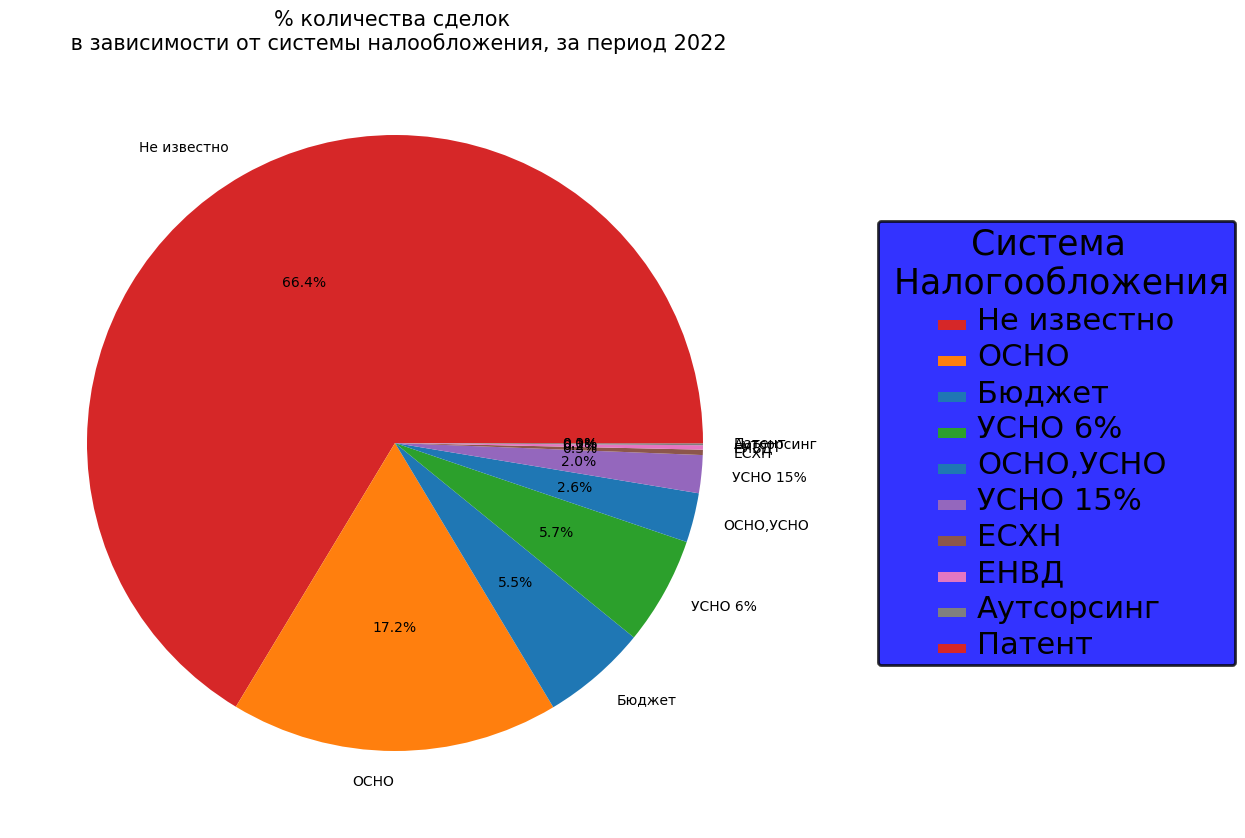

In [13]:
values = data_n_cnt['СистемаНалогообложения']

# Цвета секторов (можно настроить под ваши нужды)
colors = ['tab:red', 'tab:orange', 'tab:blue', 'tab:green', 'tab:blue', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray']

# Создание круговой диаграммы
fig, ax = plt.subplots(figsize=(10, 10))  # Установка размеров фигуры

ax.pie(data_n_cnt['Количество сделок'], labels=values, colors=colors, autopct='%1.1f%%')

legend = ax.legend(labels=values, title="        Система \n Налогообложения", 
                   loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))

legend.get_frame().set_edgecolor('black')  # Цвет рамки легенды
legend.get_frame().set_linewidth(2)  # Толщина линии рамки легенды
legend.get_frame().set_facecolor('Blue')  # Цвет фона легенды
legend.set_bbox_to_anchor((1.6, 0.5))  # Положение легенды

legend.get_title().set_fontsize(25)  # Размер заголовка легенды
for text in legend.get_texts():
    text.set_fontsize(22)  # Размер текста в легенде

plt.title("% количества сделок \n в зависимости от системы налообложения, за период 2022", fontsize=15)

plt.show()

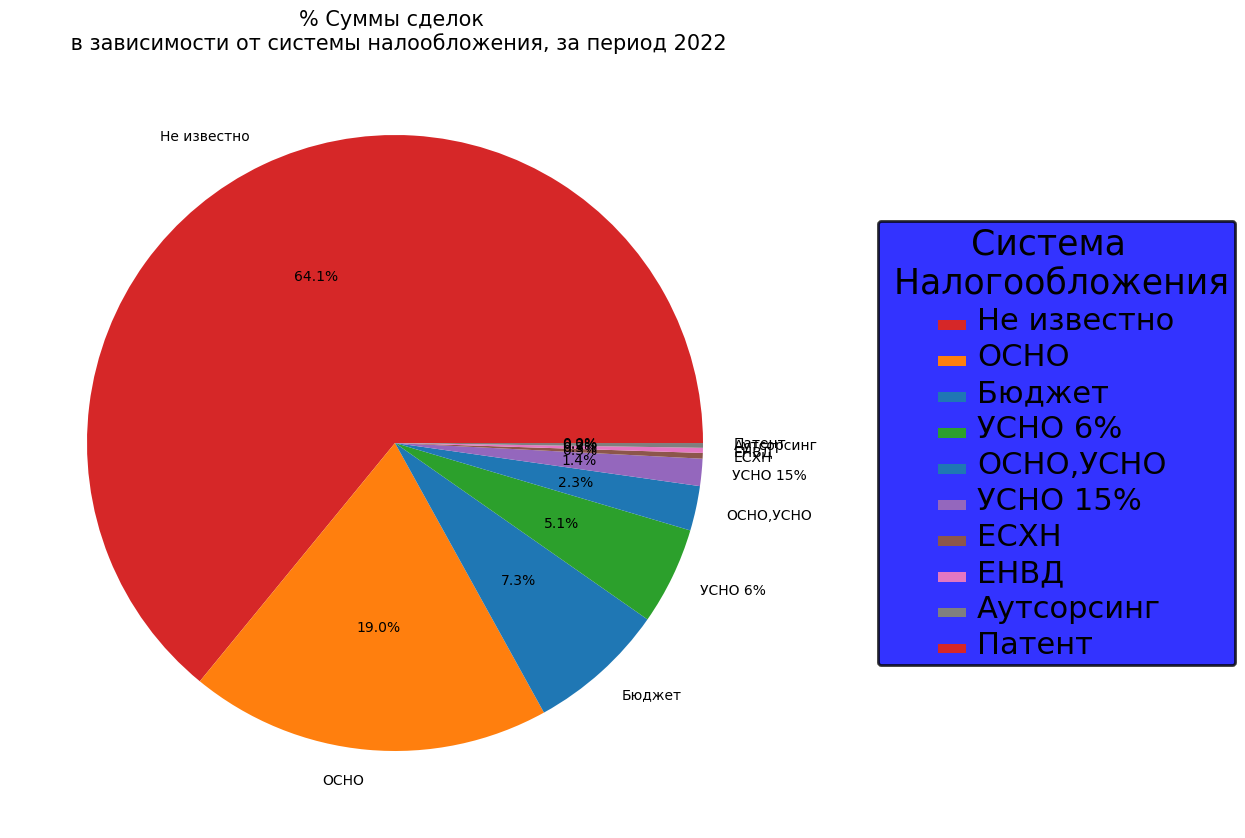

In [14]:
values = data_n_cnt['СистемаНалогообложения']

# Цвета секторов (можно настроить под ваши нужды)
colors = ['tab:red', 'tab:orange', 'tab:blue', 'tab:green', 'tab:blue', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray']

# Создание круговой диаграммы
fig, ax = plt.subplots(figsize=(10, 10))  # Установка размеров фигуры

ax.pie(data_n_cnt['СуммаДокумента'], labels=values, colors=colors, autopct='%1.1f%%')

legend = ax.legend(labels=values, title="        Система \n Налогообложения", 
                   loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))

legend.get_frame().set_edgecolor('black')  # Цвет рамки легенды
legend.get_frame().set_linewidth(2)  # Толщина линии рамки легенды
legend.get_frame().set_facecolor('Blue')  # Цвет фона легенды
legend.set_bbox_to_anchor((1.6, 0.5))  # Положение легенды

legend.get_title().set_fontsize(25)  # Размер заголовка легенды
for text in legend.get_texts():
    text.set_fontsize(22)  # Размер текста в легенде

plt.title("% Суммы сделок \n в зависимости от системы налообложения, за период 2022", fontsize=15)

plt.show()

# Рассмотрим выручки компаний по 5 системам налогообложения

# Система Налогообложения ОСНО

In [17]:
osno=data.loc[((data['ВыручкаОтПродаж']>=0) & (data['СистемаНалогообложения']=='ОСНО'))]\
[['Код','СистемаНалогообложения','ВыручкаОтПродаж']] 
# Удаляем дубли
osno=osno.drop_duplicates ()

quantile_15 = osno['ВыручкаОтПродаж'].quantile(0.15)
quantile_20 = osno['ВыручкаОтПродаж'].quantile(0.20)
quantile_25 = osno['ВыручкаОтПродаж'].quantile(0.25)
median=osno['ВыручкаОтПродаж'].median()
quantile_75 = osno['ВыручкаОтПродаж'].quantile(0.75)

In [19]:
print('Квартили распределения системы налогообложения ОСНО')
print()
print(f'У 15% клиентов, у которых была сделка, \nвыручка меньше {quantile_15}\nа у 85% больше {quantile_15}')
print()
print()
print(f'У 20% клиентов, у которых была сделка, \nвыручка меньше {quantile_20}\nа у 80% больше {quantile_20}')
print()
print()
print(f'У 25% клиентов, у которых была сделка, \nвыручка меньше {quantile_25}\nа у 75% больше {quantile_25}')
print()
print()
print(f'У 50% клиентов, у которых была сделка, \nвыручка меньше {median}\nа у 50% больше {median}')
print()
print()
print(f'У 75% клиентов, у которых была сделка, \nвыручка меньше {quantile_75}\nа у 25% больше {quantile_75}')

Квартили распределения системы налогообложения ОСНО

У 15% клиентов, у которых была сделка, 
выручка меньше 53782450.0
а у 85% больше 53782450.0


У 20% клиентов, у которых была сделка, 
выручка меньше 79349600.00000001
а у 80% больше 79349600.00000001


У 25% клиентов, у которых была сделка, 
выручка меньше 107681250.0
а у 75% больше 107681250.0


У 50% клиентов, у которых была сделка, 
выручка меньше 372928000.0
а у 50% больше 372928000.0


У 75% клиентов, у которых была сделка, 
выручка меньше 1148203000.0
а у 25% больше 1148203000.0


# Система Налогообложения Бюджет

In [23]:
b=data.loc[((data['ВыручкаОтПродаж']>=0) & (data['СистемаНалогообложения']=='Бюджет'))]\
[['Код','СистемаНалогообложения','ВыручкаОтПродаж']] 
# Удаляем дубли
b=b.drop_duplicates ()

quantile_15 = b['ВыручкаОтПродаж'].quantile(0.15)
quantile_20 = b['ВыручкаОтПродаж'].quantile(0.20)
quantile_25 = b['ВыручкаОтПродаж'].quantile(0.25)
median=b['ВыручкаОтПродаж'].median()
quantile_75 = b['ВыручкаОтПродаж'].quantile(0.75)

In [24]:
print('Квартили распределения системы налогообложения ОСНО')
print()
print(f'У 15% клиентов, у которых была сделка, \nвыручка меньше {quantile_15}\nа у 85% больше {quantile_15}')
print()
print()
print(f'У 20% клиентов, у которых была сделка, \nвыручка меньше {quantile_20}\nа у 80% больше {quantile_20}')
print()
print()
print(f'У 25% клиентов, у которых была сделка, \nвыручка меньше {quantile_25}\nа у 75% больше {quantile_25}')
print()
print()
print(f'У 50% клиентов, у которых была сделка, \nвыручка меньше {median}\nа у 50% больше {median}')
print()
print()
print(f'У 75% клиентов, у которых была сделка, \nвыручка меньше {quantile_75}\nа у 25% больше {quantile_75}')

Квартили распределения системы налогообложения ОСНО

У 15% клиентов, у которых была сделка, 
выручка меньше 37525500.00000001
а у 85% больше 37525500.00000001


У 20% клиентов, у которых была сделка, 
выручка меньше 86690000.00000003
а у 80% больше 86690000.00000003


У 25% клиентов, у которых была сделка, 
выручка меньше 135854500.0
а у 75% больше 135854500.0


У 50% клиентов, у которых была сделка, 
выручка меньше 1219295000.0
а у 50% больше 1219295000.0


У 75% клиентов, у которых была сделка, 
выручка меньше 10777006500.0
а у 25% больше 10777006500.0


# Система Налогообложения УСНО 6%

In [25]:
usno_6=data.loc[((data['ВыручкаОтПродаж']>=0) & (data['СистемаНалогообложения']=='УСНО 6%'))]\
[['Код','СистемаНалогообложения','ВыручкаОтПродаж']] 

# Удаляем дубли
usno_6=usno_6.drop_duplicates ()

quantile_15 = usno_6['ВыручкаОтПродаж'].quantile(0.15)
quantile_20 = usno_6['ВыручкаОтПродаж'].quantile(0.20)
quantile_25 = usno_6['ВыручкаОтПродаж'].quantile(0.25)
median=usno_6['ВыручкаОтПродаж'].median()
quantile_75 =usno_6['ВыручкаОтПродаж'].quantile(0.75)

In [26]:
print('Квартили распределения системы налогообложения УСНО 6%')
print()
print(f'У 15% клиентов, у которых была сделка, \nвыручка меньше {quantile_15}\nа у 85% больше {quantile_15}')
print()
print()
print(f'У 20% клиентов, у которых была сделка, \nвыручка меньше {quantile_20}\nа у 80% больше {quantile_20}')
print()
print()
print(f'У 25% клиентов, у которых была сделка, \nвыручка меньше {quantile_25}\nа у 75% больше {quantile_25}')
print()
print()
print(f'У 50% клиентов, у которых была сделка, \nвыручка меньше {median}\nа у 50% больше {median}')
print()
print()
print(f'У 75% клиентов, у которых была сделка, \nвыручка меньше {quantile_75}\nа у 25% больше {quantile_75}')

Квартили распределения системы налогообложения УСНО 6%

У 15% клиентов, у которых была сделка, 
выручка меньше 8921200.0
а у 85% больше 8921200.0


У 20% клиентов, у которых была сделка, 
выручка меньше 14303600.0
а у 80% больше 14303600.0


У 25% клиентов, у которых была сделка, 
выручка меньше 21304250.0
а у 75% больше 21304250.0


У 50% клиентов, у которых была сделка, 
выручка меньше 45937000.0
а у 50% больше 45937000.0


У 75% клиентов, у которых была сделка, 
выручка меньше 107861000.0
а у 25% больше 107861000.0


# Система Налогообложения ОСНО,УСНО

In [27]:
ou=data.loc[((data['ВыручкаОтПродаж']>=0) & (data['СистемаНалогообложения']=='ОСНО,УСНО'))]\
[['Код','СистемаНалогообложения','ВыручкаОтПродаж']] 

# Удаляем дубли
ou=ou.drop_duplicates ()

quantile_15 = ou['ВыручкаОтПродаж'].quantile(0.15)
quantile_20 = ou['ВыручкаОтПродаж'].quantile(0.20)
quantile_25 = ou['ВыручкаОтПродаж'].quantile(0.25)
median=ou['ВыручкаОтПродаж'].median()
quantile_75 =ou['ВыручкаОтПродаж'].quantile(0.75)

In [28]:
print('Квартили распределения системы налогообложения УСНО 6%')
print()
print(f'У 15% клиентов, у которых была сделка, \nвыручка меньше {quantile_15}\nа у 85% больше {quantile_15}')
print()
print()
print(f'У 20% клиентов, у которых была сделка, \nвыручка меньше {quantile_20}\nа у 80% больше {quantile_20}')
print()
print()
print(f'У 25% клиентов, у которых была сделка, \nвыручка меньше {quantile_25}\nа у 75% больше {quantile_25}')
print()
print()
print(f'У 50% клиентов, у которых была сделка, \nвыручка меньше {median}\nа у 50% больше {median}')
print()
print()
print(f'У 75% клиентов, у которых была сделка, \nвыручка меньше {quantile_75}\nа у 25% больше {quantile_75}')

Квартили распределения системы налогообложения УСНО 6%

У 15% клиентов, у которых была сделка, 
выручка меньше 28160199.999999993
а у 85% больше 28160199.999999993


У 20% клиентов, у которых была сделка, 
выручка меньше 45793600.00000001
а у 80% больше 45793600.00000001


У 25% клиентов, у которых была сделка, 
выручка меньше 62907000.0
а у 75% больше 62907000.0


У 50% клиентов, у которых была сделка, 
выручка меньше 219297000.0
а у 50% больше 219297000.0


У 75% клиентов, у которых была сделка, 
выручка меньше 989904000.0
а у 25% больше 989904000.0


# Система Налогообложения УСНО 15%

In [29]:
usno_15=data.loc[((data['ВыручкаОтПродаж']>=0) & (data['СистемаНалогообложения']=='УСНО 15%'))]\
[['Код','СистемаНалогообложения','ВыручкаОтПродаж']] 

# Удаляем дубли
usno_15=usno_15.drop_duplicates ()

quantile_15 = usno_15['ВыручкаОтПродаж'].quantile(0.15)
quantile_20 = usno_15['ВыручкаОтПродаж'].quantile(0.20)
quantile_25 = usno_15['ВыручкаОтПродаж'].quantile(0.25)
median=usno_15['ВыручкаОтПродаж'].median()
quantile_75 =usno_15['ВыручкаОтПродаж'].quantile(0.75)

In [30]:
print('Квартили распределения системы налогообложения УСНО 15%')
print()
print(f'У 15% клиентов, у которых была сделка, \nвыручка меньше {quantile_15}\nа у 85% больше {quantile_15}')
print()
print()
print(f'У 20% клиентов, у которых была сделка, \nвыручка меньше {quantile_20}\nа у 80% больше {quantile_20}')
print()
print()
print(f'У 25% клиентов, у которых была сделка, \nвыручка меньше {quantile_25}\nа у 75% больше {quantile_25}')
print()
print()
print(f'У 50% клиентов, у которых была сделка, \nвыручка меньше {median}\nа у 50% больше {median}')
print()
print()
print(f'У 75% клиентов, у которых была сделка, \nвыручка меньше {quantile_75}\nа у 25% больше {quantile_75}')

Квартили распределения системы налогообложения УСНО 15%

У 15% клиентов, у которых была сделка, 
выручка меньше 6843000.0
а у 85% больше 6843000.0


У 20% клиентов, у которых была сделка, 
выручка меньше 11426200.000000002
а у 80% больше 11426200.000000002


У 25% клиентов, у которых была сделка, 
выручка меньше 17655000.0
а у 75% больше 17655000.0


У 50% клиентов, у которых была сделка, 
выручка меньше 49527000.0
а у 50% больше 49527000.0


У 75% клиентов, у которых была сделка, 
выручка меньше 106392000.0
а у 25% больше 106392000.0


# Вывод
- Системы налогообложения в порядке приоритета:
- а) ОСНО выручка компаний от 50 млн;
- b) Бюджет выручка компаний от 30 млн;
- с) УСНО 6% выручка компаний от 8 млн;
- e) ОСНО,УСНО выручка компаний от 28 млн;
- d) УСНО 15% выручка компаний от 60 млн.